In [218]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

    Date	Date of accident (mm/dd/yyyy)
    Time	Local time
    Location	Location of accident
    Operator	Airline or operator name
    Flight #	Flight number
    Route	Complete or partial route
    Type	Aircraft type
    Registration	ICAO registration
    cn/ln	Construction or serial number / Line or fuselage number
    Aboard	Number of people aboard
    Fatalities	Number of fatalities aboard
    Ground	Ground fatalities
    Summary	Brief description of the accident


In [177]:
pd.set_option('display.max_columns', None)

In [178]:
df = pd.read_csv('airplane_crashes_and_fatalities.csv')

In [179]:
df.head()

,Unnamed: 0,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5268 non-null   int64  
 1   index         5268 non-null   int64  
 2   Date          5268 non-null   object 
 3   Time          3049 non-null   object 
 4   Location      5248 non-null   object 
 5   Operator      5250 non-null   object 
 6   Flight #      1069 non-null   object 
 7   Route         3561 non-null   object 
 8   Type          5241 non-null   object 
 9   Registration  4933 non-null   object 
 10  cn/In         4040 non-null   object 
 11  Aboard        5246 non-null   float64
 12  Fatalities    5256 non-null   float64
 13  Ground        5246 non-null   float64
 14  Summary       4878 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 617.5+ KB


In [181]:
# Parse times and categorize into periods of day
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour
df['Time']

0       17.0
1        6.0
2        NaN
3       18.0
4       10.0
        ... 
5263     6.0
5264     NaN
5265     0.0
5266     8.0
5267     NaN
Name: Time, Length: 5268, dtype: float64

In [182]:
def categorize_period(hour):
    if pd.isna(hour):
        return 'Unknown'
    if 0 <= hour < 6:
        return 'Night'
    if 6 <= hour < 12:
        return 'Morning'
    if 12 <= hour < 18:
        return 'Afternoon'
    if 18 <= hour < 23:
        return 'Evening'
    return 'Unknown'

df['Period'] = df['Time'].apply(categorize_period)

In [183]:
df.head()

,Unnamed: 0,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Period
0,0,0,09/17/1908,17.0,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Afternoon
1,1,1,07/12/1912,6.0,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Morning
2,2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Unknown
3,3,3,09/09/1913,18.0,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Evening
4,4,4,10/17/1913,10.0,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Morning


### Count the number of crashes by the time of day (night, morning, afternoon, evening), and visualize the results. Identify the riskiest period.

In [184]:
period_group = df.groupby('Period')['Period'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)
period_group

,Period,Count
4,Unknown,2343
0,Afternoon,970
2,Morning,879
1,Evening,694
3,Night,382


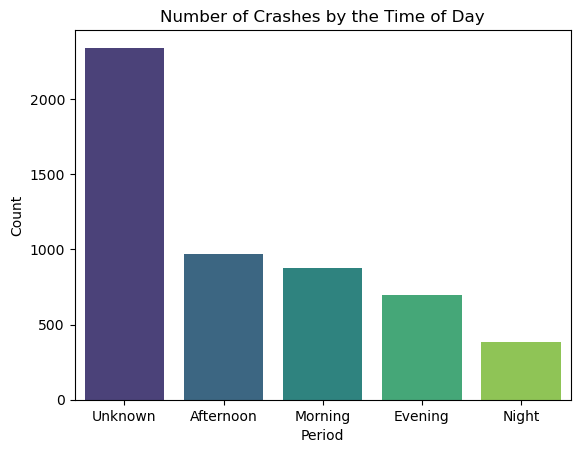

In [210]:
sns.barplot(
    data=period_group,
    x='Period',
    y='Count',
    palette='viridis'
)
plt.title('Number of Crashes by the Time of Day')
plt.show()

### Visualize the number of crashes by decade and determine which decade had the greatest number of accidents.

In [186]:
df['Year'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce').dt.year

In [187]:
df['Decade'] = (df['Year'] // 10 * 10).astype('int64').astype(str) + 's'

In [188]:
df['Decade']

0       1900s
1       1910s
2       1910s
3       1910s
4       1910s
        ...  
5263    2000s
5264    2000s
5265    2000s
5266    2000s
5267    2000s
Name: Decade, Length: 5268, dtype: object

In [189]:
decade_group = df.groupby('Decade').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

In [190]:
decade_group

,Decade,Count
7,1970s,837
9,1990s,775
6,1960s,721
8,1980s,717
5,1950s,596
10,2000s,583
4,1940s,510
3,1930s,323
2,1920s,178
1,1910s,27


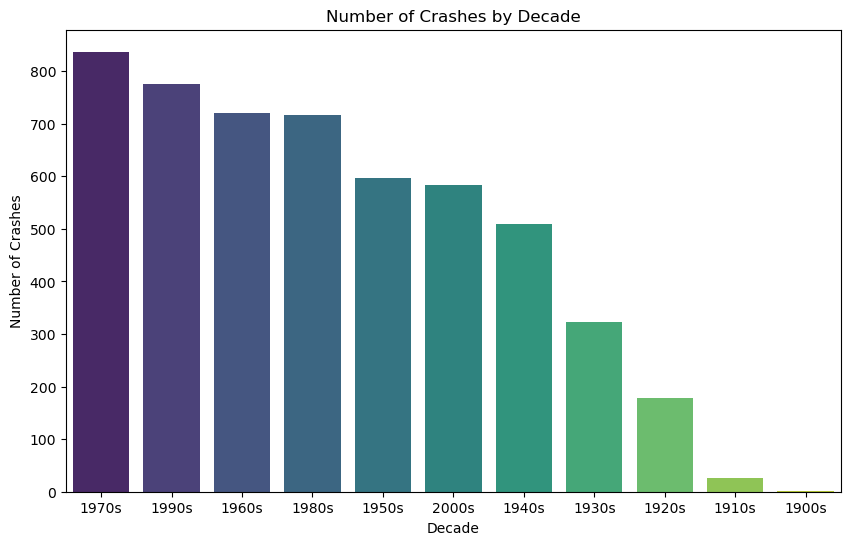

In [191]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=decade_group,
    x='Decade',
    y='Count',
    palette='viridis'
)
plt.title('Number of Crashes by Decade')
plt.ylabel('Number of Crashes')
plt.show()

In [192]:
print(f"Decade with the greatest number of accidents: : {decade_group['Decade'].iloc[0]}")

Decade with the greatest number of accidents: : 1970s


### Identify the three operators with the highest number of crashes, calculate their fatality rates, and determine the operator with the highest rate.

In [194]:
operator_stats = (
    df.groupby('Operator')
    .agg({'Aboard': 'sum', 'Fatalities': 'sum', 'Decade': 'count'})
    .rename(columns={'Decade': 'Crashes'})
    .reset_index()
)

In [195]:
operator_stats

,Operator,Aboard,Fatalities,Crashes
0,A B Aerotransport,17.0,3.0,2
1,AB Aerotransport,64.0,58.0,3
2,ACES Colombia,41.0,40.0,3
3,ADC Airlines,160.0,97.0,2
4,ADES Colombia,23.0,22.0,2
...,...,...,...,...
2471,Zantop Air Transport,13.0,13.0,4
2472,Zantop Airways,2.0,2.0,1
2473,Zantop International Airlines,4.0,4.0,1
2474,Zen Nippon,2.0,2.0,1


In [202]:
operator_stats['Fatality_Rate'] = round(operator_stats['Fatalities'] / operator_stats['Aboard'],2)

In [205]:
operator_stats = operator_stats.sort_values(by='Crashes', ascending=False)

In [206]:
operator_stats

,Operator,Aboard,Fatalities,Crashes,Fatality_Rate
84,Aeroflot,8870.0,7156.0,179,0.81
1559,Military - U.S. Air Force,4502.0,3717.0,176,0.83
197,Air France,2874.0,1734.0,70,0.60
838,Deutsche Lufthansa,510.0,396.0,65,0.78
2343,United Air Lines,2460.0,1021.0,44,0.42
...,...,...,...,...,...
913,Everest Air,19.0,19.0,1,1.00
912,Europe Aero Service EAS,22.0,22.0,1,1.00
911,Eurojet Italila,2.0,2.0,1,1.00
910,Euroair,1.0,1.0,1,1.00


In [207]:
top3_operators = operator_stats.head(3)
top3_operators

,Operator,Aboard,Fatalities,Crashes,Fatality_Rate
84,Aeroflot,8870.0,7156.0,179,0.81
1559,Military - U.S. Air Force,4502.0,3717.0,176,0.83
197,Air France,2874.0,1734.0,70,0.60


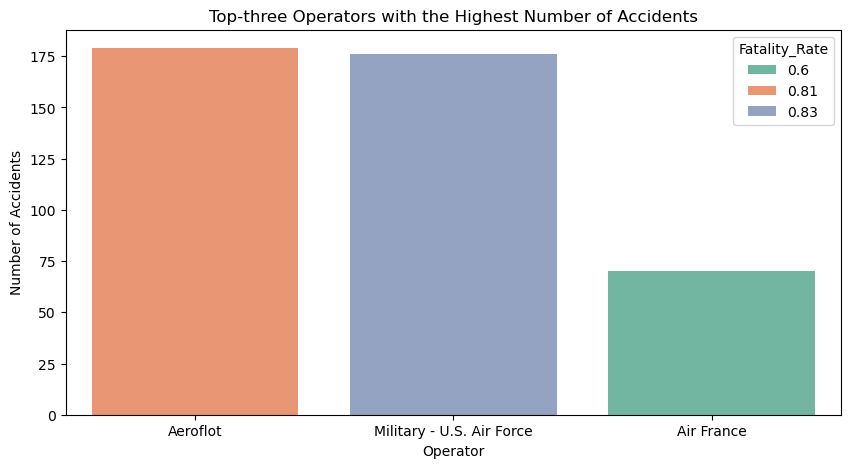

In [217]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top3_operators,
    x='Operator',
    y='Crashes',
    hue='Fatality_Rate',
   palette='Set2'
)
plt.title('Top-three Operators with the Highest Number of Accidents')
plt.ylabel('Number of Accidents')
plt.show()